<h1>Análisis exploratorio a cuotas y estados </h1>
<p>Proyecto aplicado - Rescindidos Funeraria La Aurora</´p>
<p>Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import re


# Estados

In [2]:
estados = pd.read_csv("../data/outputs/estados.csv")
estados = estados[["CodigoPrograma", "estado", "fecha"]]
estados.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CodigoPrograma,91397.0,NaN,NaN,NaN,85774.2069,56742.017271,52.0,31212.0,78460.0,139000.0,176178.0
estado,91397,58,Activo - Creacion de Solicitud,37100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,91397,41758,2022-01-08 07:00:00.777,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cuotas = pd.read_csv("../data/outputs/cuotas.csv")
cuotas.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CodigoPrograma,623745.0,NaN,NaN,NaN,50318.932735,44675.201487,56.0,15545.0,37335.0,60283.0,174604.0
factura,623745,401090,FEPE-3982,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valorSinDescuento,623745.0,NaN,NaN,NaN,186910.137281,4179813.883796,1.0,17200.0,24200.0,72222.0,168829360.0
valorcondescuento,623745.0,NaN,NaN,NaN,176048.709146,4179053.939262,1.0,17200.0,24000.0,63720.0,168829360.0
cuotaSinDescuento,623745.0,NaN,NaN,NaN,19491.832578,22210.857617,-499454.1666,15000.0,17700.0,21700.0,4500000.0
cuotaConDescuento,623745.0,NaN,NaN,NaN,18367.845766,19584.782504,-499454.1666,13650.0,16700.0,20800.0,3825000.0
porcentajeDescuento,623745.0,NaN,NaN,NaN,5.068896,9.351622,0.0,0.0,0.0,10.0,2800.0
valorDescuento,623745.0,NaN,NaN,NaN,1124.37861,3761.511758,-35067.0,0.0,0.0,1420.0,675000.0
contrato,623745.0,NaN,NaN,NaN,1.748803,0.758765,1.0,1.0,2.0,2.0,6.0
contrato.1,623745.0,NaN,NaN,NaN,6.066312,3.591336,1.0,3.0,6.0,9.0,48.0


In [4]:
estados = pd.concat([estados.drop("estado",axis=1),\
    estados["estado"].str.split("-", expand=True, n=1)\
        .rename(columns={0:"estado", 1:"motivo"})], axis=1)

In [5]:
new_estados = estados.drop_duplicates("CodigoPrograma")["CodigoPrograma"]
new_estados.head()

0    55
1    56
2    58
3    72
4    73
Name: CodigoPrograma, dtype: int64

In [6]:
temp = estados.groupby(["CodigoPrograma", "estado"]
                       ).count().sort_values("fecha").reset_index()
temp["estado"] = temp["estado"].str.replace(" ", "")
new_estados = temp[temp["estado"] == "Activo"][["CodigoPrograma",
                                  "estado", "fecha"]]\
                                      .merge(new_estados, on="CodigoPrograma")\
                                          .rename(columns={"fecha": "qactivos"})


In [7]:
temp = estados.groupby(["CodigoPrograma", "estado"]
                       ).count().sort_values("fecha").reset_index()
temp["estado"] = temp["estado"].str.replace(" ", "")
new_estados = temp[temp["estado"] == "Inactivo"][["CodigoPrograma",
                                                "estado", "fecha"]]\
    .merge(new_estados, on="CodigoPrograma")\
    .rename(columns={"fecha": "qinactivos"})


In [8]:
new_estados =new_estados.drop(["estado_x", "estado_y"], axis=1)
new_estados.head()

,CodigoPrograma,qinactivos,qactivos
0,52755,1,1
1,52750,1,2
2,52768,1,1
3,52820,1,1
4,52808,1,2


Se ordenan para obtener la fecha mas reciente y la fecha final para activos e inactivos

In [9]:
new_estados = new_estados.merge(estados[estados["estado"] == "Activo "]
    .sort_values("fecha").drop_duplicates("CodigoPrograma", keep="first")\
        .drop("estado", axis=1).rename(columns={"fecha": "fechaactivoi",\
            "motivo":"motivoactivoi"}), on="CodigoPrograma")


In [10]:
new_estados = new_estados.merge(estados[estados["estado"] == "Inactivo "]
                                .sort_values("fecha").drop_duplicates("CodigoPrograma", keep="last")
                                .drop("estado", axis=1).rename(columns={"fecha": "fechainactivof",
                                                                        "motivo": "motivoinactivof"}), on="CodigoPrograma")


In [11]:
new_estados = new_estados.merge(estados[estados["estado"] == "Inactivo "]
                                .sort_values("fecha").drop_duplicates("CodigoPrograma", keep="first")
                                .drop("estado", axis=1).rename(columns={"fecha": "fechainactivoi",
                                                                        "motivo": "motivoinactivoi"}), on="CodigoPrograma")


In [12]:
new_estados = new_estados.merge(estados[estados["estado"] == "Activo "]
                                .sort_values("fecha").drop_duplicates("CodigoPrograma", keep="last")
                                .drop("estado", axis=1).rename(columns={"fecha": "fechaactivof",
                                                                        "motivo": "motivoactivof"}), on="CodigoPrograma")


In [13]:
new_estados["fechaactivof"] = new_estados["fechaactivof"].apply(lambda x: datetime.strptime(
    x[:10], "%Y-%m-%d"))
new_estados["fechaactivoi"] = new_estados["fechaactivoi"].apply(lambda x: datetime.strptime(
    x[:10], "%Y-%m-%d"))
new_estados["fechainactivoi"] = new_estados["fechainactivoi"].apply(lambda x: datetime.strptime(
    x[:10], "%Y-%m-%d"))
new_estados["fechainactivof"] = new_estados["fechainactivof"].apply(lambda x: datetime.strptime(
    x[:10], "%Y-%m-%d"))
new_estados.head()


,CodigoPrograma,qinactivos,qactivos,fechaactivoi,motivoactivoi,fechainactivof,motivoinactivof,fechainactivoi,motivoinactivoi,fechaactivof,motivoactivof
0,52755,1,1,2015-10-07,Creacion de Solicitud,2021-12-07,Precio del plan,2021-12-07,Precio del plan,2015-10-07,Creacion de Solicitud
1,52750,1,2,2005-03-30,Creacion de Solicitud,2021-09-01,Inactivo para reactivación,2021-09-01,Inactivo para reactivación,2021-09-01,Activo
2,52768,1,1,2018-02-13,Creacion de Solicitud,2021-05-14,Dificultad para ubicarlo,2021-05-14,Dificultad para ubicarlo,2018-02-13,Creacion de Solicitud
3,52820,1,1,2017-04-26,Creacion de Solicitud,2022-09-17,Fallecimiento del titular,2022-09-17,Fallecimiento del titular,2017-04-26,Creacion de Solicitud
4,52808,1,2,2019-04-25,Creacion de Solicitud,2020-09-08,Incumplimiento en compromiso de pago,2020-09-08,Incumplimiento en compromiso de pago,2020-09-08,Activo


In [14]:
new_estados["inactivof_activoi"] = new_estados["fechainactivof"] - \
    new_estados["fechaactivoi"]
new_estados["inactivof_activof"] = new_estados["fechainactivof"] - \
    new_estados["fechaactivof"]
new_estados["inactivoi_activoi"] = new_estados["fechainactivoi"] - \
    new_estados["fechaactivoi"]
new_estados


,CodigoPrograma,qinactivos,qactivos,fechaactivoi,motivoactivoi,fechainactivof,motivoinactivof,fechainactivoi,motivoinactivoi,fechaactivof,motivoactivof,inactivof_activoi,inactivof_activof,inactivoi_activoi
0,52755,1,1,2015-10-07,Creacion de Solicitud,2021-12-07,Precio del plan,2021-12-07,Precio del plan,2015-10-07,Creacion de Solicitud,2253 days,2253 days,2253 days
1,52750,1,2,2005-03-30,Creacion de Solicitud,2021-09-01,Inactivo para reactivación,2021-09-01,Inactivo para reactivación,2021-09-01,Activo,5999 days,0 days,5999 days
2,52768,1,1,2018-02-13,Creacion de Solicitud,2021-05-14,Dificultad para ubicarlo,2021-05-14,Dificultad para ubicarlo,2018-02-13,Creacion de Solicitud,1186 days,1186 days,1186 days
3,52820,1,1,2017-04-26,Creacion de Solicitud,2022-09-17,Fallecimiento del titular,2022-09-17,Fallecimiento del titular,2017-04-26,Creacion de Solicitud,1970 days,1970 days,1970 days
4,52808,1,2,2019-04-25,Creacion de Solicitud,2020-09-08,Incumplimiento en compromiso de pago,2020-09-08,Incumplimiento en compromiso de pago,2020-09-08,Activo,502 days,0 days,502 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15934,124801,5,3,2021-08-31,Creacion de Solicitud,2022-07-25,Terminación y uso del contrato,2021-09-02,Pendiente primer pago,2022-03-02,Activo,328 days,145 days,2 days
15935,89101,5,3,2015-08-20,Creacion de Solicitud,2022-01-02,Inactivo rescindido,2021-05-10,Inactivo para reactivación,2022-01-02,Activo,2327 days,0 days,2090 days
15936,102639,6,3,2014-04-15,Creacion de Solicitud,2022-07-18,No Interesado,2021-06-07,Inactivo para reactivación,2022-04-23,Activo,3016 days,86 days,2610 days
15937,25473,6,4,2020-04-23,Creacion de Solicitud,2021-02-15,Programa con inconsistencia,2020-05-24,Pendiente primer pago,2020-10-17,Programa con inconsistencia,298 days,121 days,31 days


In [15]:
new_estados.to_csv("../data/outputs/estados_v2.csv", index=False)

# Recaudos

In [16]:
recaudos = pd.read_csv("../data/outputs/gestionrecaudo.csv")
recaudos = recaudos.dropna(subset=["fechaenvio", "fechaidealpago", "estado", "CodigoPrograma"])
recaudos.head(2)


,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario
0,56,1900-01-01 00:00:00,2020-07-07 00:00:00,NaN,Exitosa,Gestión de recaudo exitosa
1,56,2020-08-15 05:00:00,2020-07-07 00:00:00,"linea personal no esta en uso, linea Alterna n...",Fallido,Gestión de recaudo no exitosa


In [17]:
recaudos = recaudos.drop(recaudos[recaudos["fechaidealpago"].str.isalpha()].index)
recaudos = recaudos.drop(
    recaudos[recaudos["fechaidealpago"].str.contains("a")].index)
recaudos = recaudos.drop(
    recaudos[recaudos["fechaidealpago"].apply(lambda x: len(x) < 10)].index)
recaudos = recaudos.drop(recaudos[recaudos["fechaenvio"].str.contains("a")].index)
recaudos = recaudos.drop(
    recaudos[recaudos["fechaenvio"].apply(lambda x: len(x) < 10)].index)
recaudos["fechaenvio"] = recaudos["fechaenvio"].apply(lambda x: datetime.strptime(
    x[:10], "%Y-%m-%d"))
recaudos["fechaidealpago"] = recaudos["fechaidealpago"].apply(lambda x: datetime.strptime(
    x[:10], "%Y-%m-%d"))
recaudos.head()

,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario
0,56,1900-01-01,2020-07-07,NaN,Exitosa,Gestión de recaudo exitosa
1,56,2020-08-15,2020-07-07,"linea personal no esta en uso, linea Alterna n...",Fallido,Gestión de recaudo no exitosa
2,56,1900-01-01,2020-07-07,NaN,Inactivo,Gestión no ejecutada para el día planeado
3,56,1900-01-01,2020-07-07,se deja msj con Olga. tt linea personal fuer d...,Exitosa,Gestión de recaudo exitosa
4,58,1900-01-01,2020-08-10,NaN,Exitosa,Gestión de recaudo exitosa


In [18]:
recaudos["gestion"] = recaudos["fechaenvio"] - recaudos["fechaidealpago"]



In [19]:
recaudos

,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario,gestion
0,56,1900-01-01,2020-07-07,NaN,Exitosa,Gestión de recaudo exitosa,-44017 days
1,56,2020-08-15,2020-07-07,"linea personal no esta en uso, linea Alterna n...",Fallido,Gestión de recaudo no exitosa,39 days
2,56,1900-01-01,2020-07-07,NaN,Inactivo,Gestión no ejecutada para el día planeado,-44017 days
3,56,1900-01-01,2020-07-07,se deja msj con Olga. tt linea personal fuer d...,Exitosa,Gestión de recaudo exitosa,-44017 days
4,58,1900-01-01,2020-08-10,NaN,Exitosa,Gestión de recaudo exitosa,-44051 days
...,...,...,...,...,...,...,...
886515,71368,2021-02-04,2021-01-26,"3102339468 tt o se contacta, pero recaudador e...",Fallido,Gestión de recaudo no exitosa,9 days
886516,71368,2020-08-03,2021-01-26,La Aurora te recuerda tener tu Previsión Exequ...,Exitosa,Gestión de recaudo exitosa,-176 days
886517,71368,1900-01-01,2021-01-26,},Fallido,Gestión de recaudo cambio en cuotas de carpet...,-44220 days
886518,120467,1900-01-01,2022-02-01,NaN,Exitosa,Gestión de recaudo exitosa,-44591 days


In [20]:
recaudos[recaudos["gestion"] < dt.timedelta(days=1)]


,CodigoPrograma,fechaenvio,fechaidealpago,mensaje,estado,comentario,gestion
0,56,1900-01-01,2020-07-07,NaN,Exitosa,Gestión de recaudo exitosa,-44017 days
2,56,1900-01-01,2020-07-07,NaN,Inactivo,Gestión no ejecutada para el día planeado,-44017 days
3,56,1900-01-01,2020-07-07,se deja msj con Olga. tt linea personal fuer d...,Exitosa,Gestión de recaudo exitosa,-44017 days
4,58,1900-01-01,2020-08-10,NaN,Exitosa,Gestión de recaudo exitosa,-44051 days
5,58,1900-01-01,2020-08-10,NaN,Inactivo,Gestión no ejecutada para el día planeado,-44051 days
...,...,...,...,...,...,...,...
886514,71368,1900-01-01,2021-01-26,NaN,Exitosa,Gestión de recaudo exitosa,-44220 days
886516,71368,2020-08-03,2021-01-26,La Aurora te recuerda tener tu Previsión Exequ...,Exitosa,Gestión de recaudo exitosa,-176 days
886517,71368,1900-01-01,2021-01-26,},Fallido,Gestión de recaudo cambio en cuotas de carpet...,-44220 days
886518,120467,1900-01-01,2022-02-01,NaN,Exitosa,Gestión de recaudo exitosa,-44591 days


In [21]:
recaudos["estado"].unique()

array(['Exitosa ', 'Fallido ', 'Inactivo ', 'Anulado '], dtype=object)

In [22]:
temp1 = recaudos[["CodigoPrograma", "estado"]]\
    [recaudos["estado"]== "Exitosa "]\
        .groupby(["CodigoPrograma"]).count().reset_index().rename(columns={"estado": "recauExitoso"})


In [23]:
temp2 = recaudos[["CodigoPrograma", "estado"]][recaudos["estado"] == "Fallido "]\
    .groupby(["CodigoPrograma"]).count().reset_index().rename(columns={"estado": "recauFallido"})


In [24]:
recaudoexp = temp1.merge(temp2, on="CodigoPrograma")
recaudoexp.head(2)

,CodigoPrograma,recauExitoso,recauFallido
0,56,2,1
1,59,6,31


In [25]:
recaudoexp.to_csv("../data/outputs/gestionrecaudo_v2.csv", index=False)

# Merge con base de datos principal

In [26]:
principal = pd.read_csv("../data/outputs/principal_v0.1.csv")
principal.head(2)

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,LocalidadVenta,EstadoActual,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,latitud,longitud
0,55,2018-09-07,Luz Dary Torres Cardona,53.0,1969-07-12,5.0,0.0,Calle 46 B - Carrera 9 # 99,Familiar,La Dorada,Inactivo - Inactivo rescindido,2019-06-14 07:00:02.857,13600.0,13600.0,2018-11-14,5.457571,-74.670340
1,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Carrera 8 - Calle 17 # 28,Familiar,La Dorada,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,7050.0,7050.0,2020-07-06,5.454073,-74.668154


In [27]:
pegarestados = pd.read_csv("../data/outputs/estados_v2.csv")
pegarestados.head(2)


,CodigoPrograma,qinactivos,qactivos,fechaactivoi,motivoactivoi,fechainactivof,motivoinactivof,fechainactivoi,motivoinactivoi,fechaactivof,motivoactivof,inactivof_activoi,inactivof_activof,inactivoi_activoi
0,52755,1,1,2015-10-07,Creacion de Solicitud,2021-12-07,Precio del plan,2021-12-07,Precio del plan,2015-10-07,Creacion de Solicitud,2253 days,2253 days,2253 days
1,52750,1,2,2005-03-30,Creacion de Solicitud,2021-09-01,Inactivo para reactivación,2021-09-01,Inactivo para reactivación,2021-09-01,Activo,5999 days,0 days,5999 days


In [28]:
pegarrecaudo = pd.read_csv("../data/outputs/gestionrecaudo_v2.csv")
pegarrecaudo.head(2)


,CodigoPrograma,recauExitoso,recauFallido
0,56,2,1
1,59,6,31


In [29]:
principal = principal.merge(pegarestados, on="CodigoPrograma").merge(pegarrecaudo, on="CodigoPrograma")

In [30]:
principal.to_csv("../data/outputs/principal_v0.2.csv")

In [31]:
principal = pd.read_csv("../data/outputs/principal_v0.2.csv")
direcciones = pd.read_excel("../data/outputs/Direcciones_faltantes.xlsx")
direcciones.head(3)

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,Direccion,TipoPrograma,LocalidadVenta,EstadoActual,FechaRescindido,valorCuota_1,valorUltimaCuota,fechaIdealPago_CuotaCancelada,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud
0,6673,2018-10-16,Consuelo Rodriguez Millan,69,1953-04-19,1,0,150 Applewood Dr apt 6,Familiar,Manizales,Inactivo - No Interesado,2021-11-17 06:00:00.930,8050,9050,2021-07-17,NaN,NaN,NaN,-121.987052,37.310065
1,152148,2022-05-03,Consuelo Rodriguez Millan,69,1953-04-19,1,0,150 Applewood Dr apt 6,Familiar,Manizales,Inactivo - Venta no efectiva,2022-06-03 02:00:45.183,129000,129000,2022-05-03,NaN,NaN,NaN,-121.987052,37.310065
2,20751,2019-06-22,Fidel Jose Rojas Torres,29,1993-11-20,5,0,1944 Camargo Trains Dr,Familiar,Manizales,Inactivo - PENDIENTE DEFINIR RETIRO,2020-08-14 05:00:00.000,18500,19500,2019-06-22,NaN,NaN,NaN,-121.875630,37.408115


In [32]:
direcciones = direcciones[["CodigoPrograma", "Direccion", "LocalidadVenta",
                        "Nivel Socio Economico", "Barrio", "Localidad", "Longitud", "Latitud"]]
direcciones.head(1)

,CodigoPrograma,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud
0,6673,150 Applewood Dr apt 6,Manizales,NaN,NaN,NaN,-121.987052,37.310065


In [33]:
principal.columns

Index(['Unnamed: 0', 'CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'Direccion', 'TipoPrograma', 'LocalidadVenta', 'EstadoActual',
       'FechaRescindido', 'valorCuota_1', 'valorUltimaCuota',
       'fechaIdealPago_CuotaCancelada', 'latitud', 'longitud', 'qinactivos',
       'qactivos', 'fechaactivoi', 'motivoactivoi', 'fechainactivof',
       'motivoinactivof', 'fechainactivoi', 'motivoinactivoi', 'fechaactivof',
       'motivoactivof', 'inactivof_activoi', 'inactivof_activof',
       'inactivoi_activoi', 'recauExitoso', 'recauFallido'],
      dtype='object')

In [34]:
principal = principal.drop(["Unnamed: 0", "Direccion", "longitud",
               "latitud", "LocalidadVenta"], axis=1)


In [35]:
principal=principal.merge(direcciones, on="CodigoPrograma")


In [36]:
principal.to_csv("../data/outputs/principal_v0.2.csv", index=False)


Profesión, tipo plan y promedio edad afiliados

In [37]:
principal = pd.read_csv("../data/outputs/principal_v0.2.csv")


In [38]:
principal

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,inactivoi_activoi,recauExitoso,recauFallido,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,685 days,2,1,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,740 days,6,31,CRA 3 47 - 21 FERIAS VIEJO,La Dorada,1.0,0,0,-74.674757,5.479989
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,763 days,22,16,Calle 43 - Carrera 2 # 48,Manizales,NaN,NaN,NaN,-74.672998,5.475582
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,475 days,7,1,vereda malambo,La Dorada,NaN,NaN,NaN,-74.667984,5.472709
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,445 days,8,17,manzana 3 casa 20,La Dorada,NaN,NaN,NaN,-74.888705,5.204031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,170583,2022-11-17,Yaneth Moreno Peña,43.0,1980-01-24,5.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,1 days,2,1,Calle 30 A # 30-32,Manizales,3.0,CAMPO HERMOSO,COMUNA 3 - CUMANDAY,-75.512067,5.063437
9036,171268,2022-11-15,Alexander Naranjo Santamaria,46.0,1976-11-02,4.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,0 days,2,1,Barrio 7 de agosto,Promotora La Aurora S.A.S. Sin Oficina,NaN,NaN,NaN,NaN,NaN
9037,171953,2022-11-22,Angie Espinel,21.0,2001-06-19,6.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,1 days,2,1,Carrera 10 B - Calle 22 # 26,Promotora La Aurora S.A.S. Sin Oficina,NaN,NaN,NaN,NaN,NaN
9038,173774,2022-12-13,Jose Libardo Gonzalez Arredondo,64.0,1958-08-08,1.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,0 days,2,2,Buena vista,Manizales,NaN,NaN,NaN,NaN,NaN


In [39]:
datos_titulares = pd.read_excel("../data/base_datos_titulares_e_inscritos.xlsx")
datos_titulares.head()

,SUCURSAL_VENTA,FECHA_SOLICITUD,MOTIVO_PROGRAMA,PLAN_EXEQUIAL,TIPO_PLAN,NOMBRE_TOMADOR,EDAD_TOMADOR,PROFESION_TOMADOR,TIPO_INSCRITO,PARENTESCO,PARENTESCO_MOTIVO,NOMBRE_INSCRITO,EDAD_INSCRITO,PROFESION_INSCRITO
0,Aranzazu,2019-11-04,Activo,Aurora Plus 2020,FAMILIAR,Diana Janeth Cardona Agudelo,47,Ama de casa,PERSONA,TITULAR,NaN,Diana Janeth Cardona Agudelo,47,Ama de casa
1,Aranzazu,2019-11-04,Activo,Aurora Plus 2020,FAMILIAR,Diana Janeth Cardona Agudelo,47,Ama de casa,PERSONA,Hijo,NaN,Sergio Andres Garcia Cardona,23,Agricultor
2,Aranzazu,2019-11-04,Activo,Aurora Plus 2020,FAMILIAR,Diana Janeth Cardona Agudelo,47,Ama de casa,PERSONA,Hija,NaN,Diana Esmeralda Garcia Cardona,15,Estudiante
3,Aranzazu,2019-11-17,Activo,Aurora Plus 2020,FAMILIAR,Mari Nelly Orozco Carmona,56,Otra,PERSONA,Yerno,NaN,Gustavo Adolfo Morales Sanchez,36,Comerciante
4,Aranzazu,2019-11-17,Activo,Aurora Plus 2020,FAMILIAR,Mari Nelly Orozco Carmona,56,Otra,PERSONA,TITULAR,NaN,Mari Nelly Orozco Carmona,56,Otra


### Promedio edad afiliados tomador

In [40]:
prom_edad = datos_titulares[["NOMBRE_TOMADOR", "EDAD_INSCRITO"]]\
    .groupby("NOMBRE_TOMADOR").mean("EDAD_INSCRITO").reset_index()\
        .rename(columns={"NOMBRE_TOMADOR": "tomador", "EDAD_INSCRITO": "prom_edad_insc"})
# prom_edad["tomador"] = prom_edad["tomador"].str.lower().str.replace(" ", "")
# principal["tomador"] = principal["tomador"].str.lower().str.replace(" ", "")
data = principal.merge(prom_edad, on="tomador", how="left")
data.head()


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,recauExitoso,recauFallido,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud,prom_edad_insc
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,2,1,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237,NaN
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,6,31,CRA 3 47 - 21 FERIAS VIEJO,La Dorada,1.0,0,0,-74.674757,5.479989,NaN
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,22,16,Calle 43 - Carrera 2 # 48,Manizales,NaN,NaN,NaN,-74.672998,5.475582,NaN
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,7,1,vereda malambo,La Dorada,NaN,NaN,NaN,-74.667984,5.472709,45.333333
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,8,17,manzana 3 casa 20,La Dorada,NaN,NaN,NaN,-74.888705,5.204031,NaN


Profesion y nombre de plan

In [41]:
nom_plan = datos_titulares[["NOMBRE_TOMADOR", "PLAN_EXEQUIAL", "PROFESION_TOMADOR"]].drop_duplicates()\
    .rename(columns={"NOMBRE_TOMADOR": "tomador", "PLAN_EXEQUIAL": "nom_plan",\
        "PROFESION_TOMADOR":"profesion_tomador"})
# nom_plan["tomador"] = nom_plan["tomador"].str.lower()
data = principal.merge(nom_plan, on="tomador", how="left")
data.head()


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,recauFallido,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud,nom_plan,profesion_tomador
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,1,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237,NaN,NaN
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,31,CRA 3 47 - 21 FERIAS VIEJO,La Dorada,1.0,0,0,-74.674757,5.479989,NaN,NaN
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,16,Calle 43 - Carrera 2 # 48,Manizales,NaN,NaN,NaN,-74.672998,5.475582,NaN,NaN
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,1,vereda malambo,La Dorada,NaN,NaN,NaN,-74.667984,5.472709,Aurora Plus 2020,Agricultor
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,17,manzana 3 casa 20,La Dorada,NaN,NaN,NaN,-74.888705,5.204031,NaN,NaN


In [42]:
moda_prof_inscritos = datos_titulares[["NOMBRE_TOMADOR", "PROFESION_INSCRITO"]]\
    .sort_values("PROFESION_INSCRITO")\
    .groupby("NOMBRE_TOMADOR").agg(pd.Series.mode).reset_index()\
    .rename(columns={"NOMBRE_TOMADOR": "tomador", "PROFESION_INSCRITO": "moda_prof_inscritos"\
        })
moda_prof_inscritos


,tomador,moda_prof_inscritos
0,Abaneth Alvarez Gallego,"[Estudiante, Ninguna]"
1,Abdelo Castro Velasco,"[Ingeniero (a), No Identificada]"
2,Abdenago Forero Alarcon,Estudiante
3,Abdenago Medina Perez,Estudiante
4,Abdenago Mora,Estudiante
...,...,...
51021,Zuly Andrea Monsalve Amaya,Estudiante
51022,Zuly Patricia Rodriguez Castro,Empleado (a)
51023,Zuly Yomary Gonzalez Mora,Estudiante
51024,Zuly Yurani Pupiales Pantoja,No Identificada


In [43]:
moda_prof_inscritos["moda_prof_inscritos"] = moda_prof_inscritos["moda_prof_inscritos"].apply(
    lambda x: x if type(x) == str else " - ".join(x))
data = data.merge(moda_prof_inscritos, on="tomador", how="left")
data.head()


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237,NaN,NaN,NaN
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,CRA 3 47 - 21 FERIAS VIEJO,La Dorada,1.0,0,0,-74.674757,5.479989,NaN,NaN,NaN
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,Calle 43 - Carrera 2 # 48,Manizales,NaN,NaN,NaN,-74.672998,5.475582,NaN,NaN,NaN
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,vereda malambo,La Dorada,NaN,NaN,NaN,-74.667984,5.472709,Aurora Plus 2020,Agricultor,Agricultor - Ama de casa - Estudiante
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,manzana 3 casa 20,La Dorada,NaN,NaN,NaN,-74.888705,5.204031,NaN,NaN,NaN


In [44]:
moda_parentesco = datos_titulares[["NOMBRE_TOMADOR", "PARENTESCO"]]\
    .sort_values("PARENTESCO")\
    .groupby("NOMBRE_TOMADOR").agg(pd.Series.mode).reset_index()\
    .rename(columns={"NOMBRE_TOMADOR": "tomador", "PARENTESCO": "moda_parentesco"
                     })
moda_parentesco


,tomador,moda_parentesco
0,Abaneth Alvarez Gallego,Hija
1,Abdelo Castro Velasco,Hijo
2,Abdenago Forero Alarcon,Hija
3,Abdenago Medina Perez,"[Esposa, Hija, Hijo, Madre, TITULAR, Tia]"
4,Abdenago Mora,Hija
...,...,...
51021,Zuly Andrea Monsalve Amaya,Hermano
51022,Zuly Patricia Rodriguez Castro,"[Hermano, Hija, Madre, Padre, Sobrina, TITULAR]"
51023,Zuly Yomary Gonzalez Mora,"[Compañero, Hija, Hijo, Primo, TITULAR, Tia]"
51024,Zuly Yurani Pupiales Pantoja,Primo


In [45]:
moda_parentesco["moda_parentesco"] = moda_parentesco["moda_parentesco"].apply(
    lambda x: x if type(x) == str else " - ".join(x))
data = data.merge(moda_parentesco, on="tomador" , how="left")
data.head()


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,La Dorada,2.0,0,0,-74.668116,5.454237,NaN,NaN,NaN,NaN
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,La Dorada,1.0,0,0,-74.674757,5.479989,NaN,NaN,NaN,NaN
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,Manizales,NaN,NaN,NaN,-74.672998,5.475582,NaN,NaN,NaN,NaN
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,La Dorada,NaN,NaN,NaN,-74.667984,5.472709,Aurora Plus 2020,Agricultor,Agricultor - Ama de casa - Estudiante,Compañera - Hija - TITULAR
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,La Dorada,NaN,NaN,NaN,-74.888705,5.204031,NaN,NaN,NaN,NaN


In [46]:
data


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,La Dorada,2.0,0,0,-74.668116,5.454237,NaN,NaN,NaN,NaN
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,La Dorada,1.0,0,0,-74.674757,5.479989,NaN,NaN,NaN,NaN
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,Manizales,NaN,NaN,NaN,-74.672998,5.475582,NaN,NaN,NaN,NaN
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,La Dorada,NaN,NaN,NaN,-74.667984,5.472709,Aurora Plus 2020,Agricultor,Agricultor - Ama de casa - Estudiante,Compañera - Hija - TITULAR
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,La Dorada,NaN,NaN,NaN,-74.888705,5.204031,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,170583,2022-11-17,Yaneth Moreno Peña,43.0,1980-01-24,5.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,Manizales,3.0,CAMPO HERMOSO,COMUNA 3 - CUMANDAY,-75.512067,5.063437,NaN,NaN,NaN,NaN
9376,171268,2022-11-15,Alexander Naranjo Santamaria,46.0,1976-11-02,4.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,Promotora La Aurora S.A.S. Sin Oficina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9377,171953,2022-11-22,Angie Espinel,21.0,2001-06-19,6.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,Promotora La Aurora S.A.S. Sin Oficina,NaN,NaN,NaN,NaN,NaN,Aurora Plus 2020,Comerciante,Estudiante,Hermana - Hermano
9378,173774,2022-12-13,Jose Libardo Gonzalez Arredondo,64.0,1958-08-08,1.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,Manizales,NaN,NaN,NaN,NaN,NaN,Exhumación Y Cremación De Restos,Agricultor,Agricultor - Pensionado (a),Padre - TITULAR


In [47]:
sentiment = pd.read_csv("../data/outputs/df_tweets_proc_df.csv", sep=";")
sentiment = sentiment[["CodigoPrograma", "Neutral Score",
                    "Negative Score", "Positive Score"]]
sentiment = sentiment.groupby("CodigoPrograma").mean().reset_index()
data =data.merge(sentiment, on="CodigoPrograma", how="left")
data.head()

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,Localidad,Longitud,Latitud,nom_plan,profesion_tomador,moda_prof_inscritos,moda_parentesco,Neutral Score,Negative Score,Positive Score
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,0,-74.668116,5.454237,NaN,NaN,NaN,NaN,0.662207,0.304082,0.033711
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,0,-74.674757,5.479989,NaN,NaN,NaN,NaN,0.421943,0.563205,0.014852
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,NaN,-74.672998,5.475582,NaN,NaN,NaN,NaN,0.671160,0.193641,0.135199
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,NaN,-74.667984,5.472709,Aurora Plus 2020,Agricultor,Agricultor - Ama de casa - Estudiante,Compañera - Hija - TITULAR,0.823568,0.033186,0.143247
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,NaN,-74.888705,5.204031,NaN,NaN,NaN,NaN,0.303887,0.681288,0.014825


In [48]:
data.to_csv("../data/outputs/principal_v0.3.csv", index=False)

Revisión sesgo de selección

In [10]:
data0 = pd.read_csv("../data/consulta_promotora.csv", encoding='latin-1')
data0.shape


/tmp/ipykernel_954/2444233301.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data0 = pd.read_csv("../data/consulta_promotora.csv", encoding='latin-1')


(71248, 20)

In [12]:
data0.columns

Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'Direccion', 'TipoPrograma', 'coordenadas', 'LocalidadVenta',
       'EstadoActual', 'FechaRescindido', 'Estados', 'Cuotas', 'valorCuota_1',
       'valorUltimaCuota', 'fechaIdealPago_CuotaCancelada', 'Observaciones',
       'GestionesRecaudo'],
      dtype='object')

data1.columns

In [23]:
data2.shape

(9040, 35)

In [22]:
data2.columns

Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'TipoPrograma', 'EstadoActual', 'FechaRescindido', 'valorCuota_1',
       'valorUltimaCuota', 'fechaIdealPago_CuotaCancelada', 'qinactivos',
       'qactivos', 'fechaactivoi', 'motivoactivoi', 'fechainactivof',
       'motivoinactivof', 'fechainactivoi', 'motivoinactivoi', 'fechaactivof',
       'motivoactivof', 'inactivof_activoi', 'inactivof_activof',
       'inactivoi_activoi', 'recauExitoso', 'recauFallido', 'Direccion',
       'LocalidadVenta', 'Nivel Socio Economico', 'Barrio', 'Localidad',
       'Longitud', 'Latitud'],
      dtype='object')

In [33]:
# 1. Verifica la distribución de las variables


array([[<AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'#_inscritos_activos'}>]],
      dtype=object)

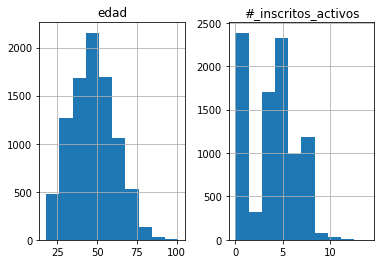

In [31]:
data2[["edad", "#_inscritos_activos"]].hist()


array([[<AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'#_inscritos_activos'}>]],
      dtype=object)

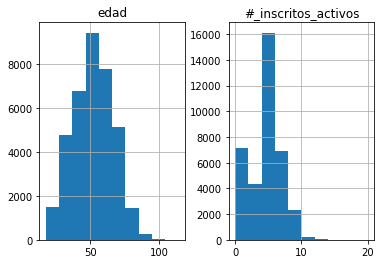

In [32]:
data1[["edad", "#_inscritos_activos"]].hist()


In [39]:
data2["EstadoActual"].str.contains("Activo - ")


0       False
1       False
2       False
3        True
4       False
        ...  
9035     True
9036     True
9037     True
9038     True
9039     True
Name: EstadoActual, Length: 9040, dtype: bool

In [36]:
data1["EstadoActual"].unique


<bound method Series.unique of 0                         Inactivo - Inactivo rescindido
1                Inactivo - Influencia de seres cercanos
2                    Inactivo - Dificultad para ubicarlo
3                           Inactivo - Venta no efectiva
4        Inactivo - Incumplimiento en compromiso de pago
                              ...                       
37095                     Activo - Pendiente primer pago
37096                     Activo - Pendiente primer pago
37097                     Activo - Pendiente primer pago
37098                     Activo - Pendiente primer pago
37099                     Activo - Pendiente primer pago
Name: EstadoActual, Length: 37100, dtype: object>

In [42]:
# Reemplaza 'grupo' y 'A' con los nombres de tus columnas y categorías
group1 = data1[data1["EstadoActual"].str.contains(
    "Activo - ")][["edad", "#_inscritos_activos"]]
group2 = data1[data1["EstadoActual"].str.contains(
    "Inactivo - ")][["edad", "#_inscritos_activos"]]
print("Estadísticas del grupo A:")
print(group1.describe())
print("Estadísticas del grupo B:")
print(group2.describe())


Estadísticas del grupo A:
               edad  #_inscritos_activos
count  26438.000000         26438.000000
mean      54.146796             4.366404
std       13.857658             2.262643
min       18.000000             0.000000
25%       44.000000             3.000000
50%       55.000000             5.000000
75%       64.000000             6.000000
max      114.000000            20.000000
Estadísticas del grupo B:
               edad  #_inscritos_activos
count  10662.000000         10662.000000
mean      47.626149             3.667698
std       14.106958             2.612620
min       18.000000             0.000000
25%       37.000000             1.000000
50%       47.000000             4.000000
75%       57.000000             5.000000
max      101.000000            16.000000


In [43]:
# Reemplaza 'grupo' y 'A' con los nombres de tus columnas y categorías
group1 = data2[data2["EstadoActual"].str.contains(
    "Activo - ")][["edad", "#_inscritos_activos"]]
group2 = data2[data2["EstadoActual"].str.contains(
    "Inactivo - ")][["edad", "#_inscritos_activos"]]
print("Estadísticas del grupo A:")
print(group1.describe())
print("Estadísticas del grupo B:")
print(group2.describe())


Estadísticas del grupo A:
              edad  #_inscritos_activos
count  2804.000000          2804.000000
mean     47.153352             4.074536
std      13.154425             2.697459
min      19.000000             0.000000
25%      37.000000             1.000000
50%      47.000000             5.000000
75%      57.000000             6.000000
max      89.000000            14.000000
Estadísticas del grupo B:
              edad  #_inscritos_activos
count  6236.000000          6236.000000
mean     47.559012             3.797466
std      13.835958             2.567741
min      18.000000             0.000000
25%      37.000000             1.000000
50%      47.000000             5.000000
75%      57.000000             5.000000
max     101.000000            12.000000


In [45]:
import matplotlib.pyplot as plt

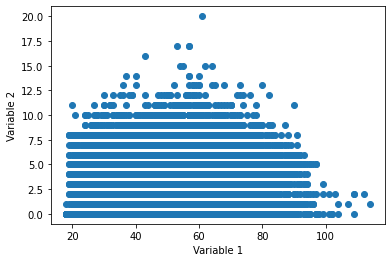

In [46]:
# Reemplaza 'variable1' y 'variable2' con los nombres de tus columnas
plt.scatter(data1['edad'], data1['#_inscritos_activos'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()


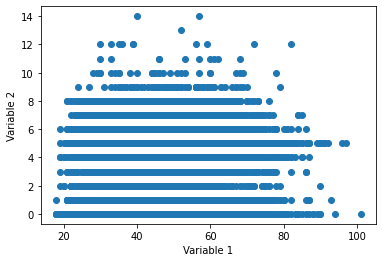

In [47]:
plt.scatter(data2['edad'], data2['#_inscritos_activos'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()


In [21]:
data2 = pd.read_csv("../data/outputs/principal_v0.2.csv")
data2

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,inactivoi_activoi,recauExitoso,recauFallido,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,685 days,2,1,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,740 days,6,31,CRA 3 47 - 21 FERIAS VIEJO,La Dorada,1.0,0,0,-74.674757,5.479989
2,84,2018-11-16,Indris Isabel Morales Herrera,30.0,1992-11-06,12.0,0.0,Familiar,Inactivo - Incumplimiento en compromiso de pago,2020-12-18 06:00:00.790,...,763 days,22,16,Calle 43 - Carrera 2 # 48,Manizales,NaN,NaN,NaN,-74.672998,5.475582
3,87,2018-11-29,Jose Nelio Ibarguen Hinestroza,56.0,1966-07-15,2.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,475 days,7,1,vereda malambo,La Dorada,NaN,NaN,NaN,-74.667984,5.472709
4,260,2019-04-08,Marcela Ruiz Montes,51.0,1971-09-25,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2020-10-09 06:00:00.950,...,445 days,8,17,manzana 3 casa 20,La Dorada,NaN,NaN,NaN,-74.888705,5.204031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,170583,2022-11-17,Yaneth Moreno Peña,43.0,1980-01-24,5.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,1 days,2,1,Calle 30 A # 30-32,Manizales,3.0,CAMPO HERMOSO,COMUNA 3 - CUMANDAY,-75.512067,5.063437
9036,171268,2022-11-15,Alexander Naranjo Santamaria,46.0,1976-11-02,4.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,0 days,2,1,Barrio 7 de agosto,Promotora La Aurora S.A.S. Sin Oficina,NaN,NaN,NaN,NaN,NaN
9037,171953,2022-11-22,Angie Espinel,21.0,2001-06-19,6.0,0.0,Familiar,Activo - Activo para verificación,9999-12-31 00:00:00.000,...,1 days,2,1,Carrera 10 B - Calle 22 # 26,Promotora La Aurora S.A.S. Sin Oficina,NaN,NaN,NaN,NaN,NaN
9038,173774,2022-12-13,Jose Libardo Gonzalez Arredondo,64.0,1958-08-08,1.0,0.0,Familiar,Activo - Activo,9999-12-31 00:00:00.000,...,0 days,2,2,Buena vista,Manizales,NaN,NaN,NaN,NaN,NaN


In [16]:
data0["Direccion"].isna().sum()


275

In [15]:
data1["Direccion"].isna().sum()

0